In [24]:
from produce_count_info_efficient import create_count_information
from og_marl.vault_utils.analyse_vault import get_saco
# from subsample_vault import subsample_smaller_vault
from plot_oaco import plot_oaco, plot_count_frequencies, plot_reward_variability
# from offline_dataset import analyse_vault
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Processing coverage information for a multi-agent dataset

In [25]:
# set to False to reduce storage requirements
random_dataset_uid_pos = -2

In [26]:
rel_dir = "vaults/"

# vault_name = "5m_vs_6m"
# vault_uids=["Expert","Medium","Medium-Replay","Mixed"]
# vault_uids=["Replay","Random"]
# vault_uids=["Good","Medium","Poor"]
# vault_uids=["Good","Medium","Poor","omiga_Good","omiga_Medium","omiga_Poor","cfcql_Expert","cfcql_Medium","cfcql_Medium-Replay","cfcql_Mixed"]
# vault_uids=["Good","Medium","Poor","cfcql_Expert","cfcql_Medium","cfcql_Medium-Replay"]

# new_vault_name = vault_name+'_120000.vlt'
new_vault_name = "medium_similar"
vault_uids = ["Medium_CFCQL","Medium_OG_MARL"]

for vault_uid in vault_uids:

    # make a smaller vault - it is easier for memory to handle
    # new_vault_name = subsample_smaller_vault(rel_dir,vault_name,vault_uid,120000)

    # # # for each new vault, store count information at the new vault location
    keys = create_count_information(rel_dir, new_vault_name, vault_uid)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/medium_similar/Medium_CFCQL
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/medium_similar/Medium_OG_MARL


In [27]:
# vltt = vault_name+'.vlt'
# returns = analyse_vault(vltt,vault_uids,rel_dir,visualise=True)
# returns = analyse_vault(new_vault_name,vault_uids,rel_dir,visualise=True,save=True)
# for key in list(returns.keys()):
#     print(key+'\t'+str(np.mean(returns[key]))+'\t'+str(np.std(returns[key]))+'\t'+str(np.max(returns[key])))

In [31]:
import pandas as pd
import seaborn as sns


def plot_oaco(rel_dir,vault_name,vault_uids,random_dataset_pos=-2,norm_wrt_state=False):
    num_unique = {}
    num_tot = []
    for uid in vault_uids:
        with open(rel_dir+vault_name+"/"+uid+"/number_unique.pickle","rb") as f:
            num_unique[uid] = pickle.load(f)
        
        with open(rel_dir+vault_name+"/"+uid+"/timesteps.pickle","rb") as f:
            tot = pickle.load(f)
        num_tot.append(tot)

    unique_df = pd.DataFrame(num_unique)
    unique_df.transpose

    fig, ax = plt.subplots(1,1,figsize=(13,4))

    print(num_tot)

    unique_df = unique_df.div(num_tot,axis=1)

    # normalise wrt random if random dataset exists
    if random_dataset_pos!=-2:
        unique_df = unique_df.div(unique_df.iloc[:,random_dataset_pos],axis=0)

    # normalise wrt random if random dataset exists
    if norm_wrt_state:
        unique_df = unique_df.div(unique_df.iloc[-1,:],axis=1)

    ax = sns.heatmap(unique_df,annot=True,fmt='.2f',square=False)
    for i in range(4):
        ax.axvline(2*i, color='white', lw=5)
    # plt.title(vault_name)
    plt.xticks(rotation=30, ha='right')
    plt.savefig(rel_dir+"/"+vault_name+"/"+"OACo_heatmap.pdf",format='pdf',bbox_inches='tight')
    plt.show()
    return

In [36]:

def plot_oaco(rel_dir,vault_name,vault_uids,random_dataset_pos=-2,norm_wrt_state=False):
    num_unique = {}
    num_tot = []
    for uid in vault_uids:
        with open(rel_dir+vault_name+"/"+uid+"/number_unique.pickle","rb") as f:
            num_unique[uid] = pickle.load(f)
        
        # with open(rel_dir+vault_name+"/"+uid+"/timesteps.pickle","rb") as f:
        #     tot = pickle.load(f)
        # num_tot.append(tot)
        num_tot.append(140000)

    unique_df = pd.DataFrame(num_unique)
    unique_df.transpose

    # print(unique_df['Good'])
    unique_df.iloc[:5,:] = unique_df.iloc[:5,:].div(unique_df.iloc[-2,:],axis=1)
    unique_df.iloc[5,:] = unique_df.iloc[5,:].div(unique_df.iloc[-1,:])

    # unique_df = unique_df.div(unique_df.iloc[:,random_dataset_pos],axis=0)

    fig, ax = plt.subplots(1,1,figsize=(13,4))

    print(num_tot)

    unique_df.iloc[-1,:] = unique_df.iloc[-1,:].div(num_tot)

    # normalise wrt random if random dataset exists
    if random_dataset_pos!=-2:
        unique_df = unique_df.div(unique_df.iloc[:,random_dataset_pos],axis=0)

    # normalise wrt random if random dataset exists
    if norm_wrt_state:
        unique_df = unique_df.div(unique_df.iloc[-1,:],axis=1)

    ax = sns.heatmap(unique_df,annot=True,fmt='.2f',square=False)
    for i in range(4):
        ax.axvline(2*i, color='white', lw=5)
    # plt.title(vault_name)
    plt.xticks(rotation=30, ha='right')
    plt.savefig(rel_dir+"/"+vault_name+"/"+"OACo_heatmap.pdf",format='pdf',bbox_inches='tight')
    plt.show()
    return

[140000, 140000]


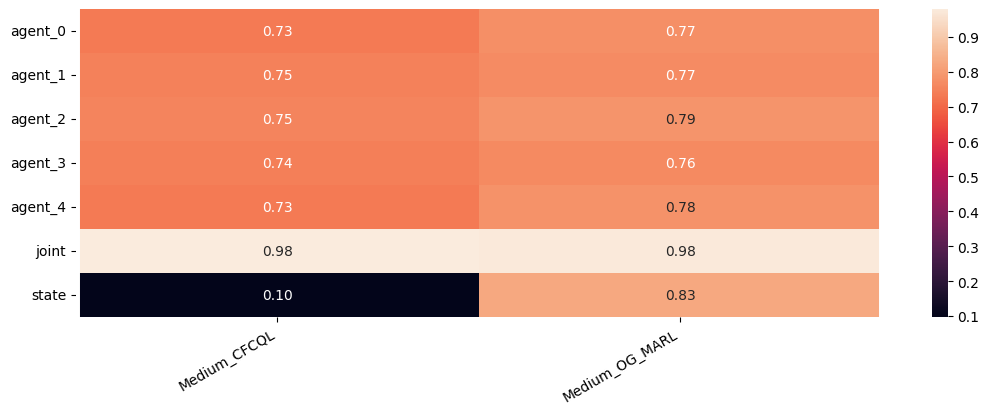

In [37]:

vault_uids = ["Medium_CFCQL","Medium_OG_MARL"]
# vault_uids=["Good","cfcql_Expert","Medium","cfcql_Medium","Poor","cfcql_Medium-Replay"]
plot_oaco(rel_dir,new_vault_name,vault_uids,-2,False)

In [38]:
def plot_top_five(rel_dir,vault_name,vault_uids): 

    colors = {
            'death':'black',
            'misc repeated':'orange',
            'non-repeated':'yellow',
            '0':'green',
            '1':'blue',
            '2':'turquoise',
            '3':'red',
            '4':'purple',
            }
    num_unique = {}
    top_5_vals = {}
    top_5_counts = {}

    for uid in vault_uids:
        sizes = {}
        labels = {}

        with open(rel_dir+"/"+vault_name+"/"+uid+"/number_unique.pickle","rb") as f:
            num_unique[uid] = pickle.load(f)

        with open(rel_dir+"/"+vault_name+"/"+uid+"/top_five.pickle","rb") as f:
           (top_5_vals[uid], top_5_counts[uid]) = pickle.load(f)

        labels_dict = {}
        sizes_dict = {}
        for key in list(num_unique[uid].keys()):
            sizes = []
            labels = []

            sizes.append(num_unique[uid][key])
            labels.append('non-repeated')

            death_state = -2
            states_in_top_5 = []
            for i,val in enumerate(top_5_vals[uid][key]):
                # print(val)
                if not val.astype(bool).any():
                    death_state = i

                    sizes.append(top_5_counts[uid][key][i])
                    print(top_5_counts[uid][key][i])
                    labels.append("death")
                else :
                    # states_in_top_5.append(val)
                    sizes.append(top_5_counts[uid][key][i])
                    # labels.append(top_5_vals[uid][key][i])
                    labels.append(str(i))
            # print(tt(key)
            # prinop_5_vals[uid][key])
            

            # todo get exact numberprint(sum(sizes[key]))
            sizes.append(120000-sum(sizes))
            labels.append("misc repeated")

            labels_dict[key] = labels
            sizes_dict[key] = sizes

            sizes_offset = np.cumsum(sizes)-sizes

            # plt.pie(sizes, labels=labels)
            # plt.title(str(key)+str(uid))
            # plt.show()
            for i in range(len(sizes)):
                plt.bar([key],sizes[i], 0.4, bottom=sizes_offset[i],color=colors[labels[i]])
    
        plt.title(uid)
        plt.show()
    
    return

In [39]:
def plot_top_five(rel_dir,vault_name,vault_uids): 

    colors = {
            'death':'black',
            'misc repeated':'orange',
            'non-repeated':'yellow',
            '0':'green',
            '1':'blue',
            '2':'turquoise',
            '3':'red',
            '4':'purple',
            }
    
    num_unique = {}
    top_5_vals = {}
    top_5_counts = {}

    for uid in vault_uids:
        sizes = {}
        labels = {}

        with open(rel_dir+"/"+vault_name+"/"+uid+"/number_unique.pickle","rb") as f:
            num_unique[uid] = pickle.load(f)

        with open(rel_dir+"/"+vault_name+"/"+uid+"/top_five.pickle","rb") as f:
           (top_5_vals[uid], top_5_counts[uid]) = pickle.load(f)

        labels_dict = {}
        sizes_dict = {}
        for key in list(num_unique[uid].keys()):
            sizes = []
            labels = []

            sizes.append(num_unique[uid][key])
            labels.append('non-repeated')

            death_state = -2
            states_in_top_5 = []
            for i,val in enumerate(top_5_vals[uid][key]):
                # print(val)
                if not val.astype(bool).any():
                    death_state = i

                    sizes.append(top_5_counts[uid][key][i])
                    print(top_5_counts[uid][key][i])
                    labels.append("death")
                elif not (val in states_in_top_5):
                    states_in_top_5.append(val)
                    sizes.append(top_5_counts[uid][key][i])
                    # labels.append(top_5_vals[uid][key][i])
                    labels.append(str(i))

            # prinop_5_vals[uid][key])
            

            # todo get exact numberprint(sum(sizes[key]))
            sizes.append(120000-sum(sizes))
            labels.append("misc repeated")

            labels_dict[key] = labels
            sizes_dict[key] = sizes

            sizes_offset = np.cumsum(sizes)-sizes

            # plt.pie(sizes, labels=labels)
            # plt.title(str(key)+str(uid))
            # plt.show()
            for i in range(len(sizes)):
                plt.bar([key],sizes[i], 0.4, bottom=sizes_offset[i],color=colors[labels[i]])
    
        plt.title(uid)
        plt.show()
    
    return

In [40]:
plot_top_five(rel_dir,new_vault_name,vault_uids)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

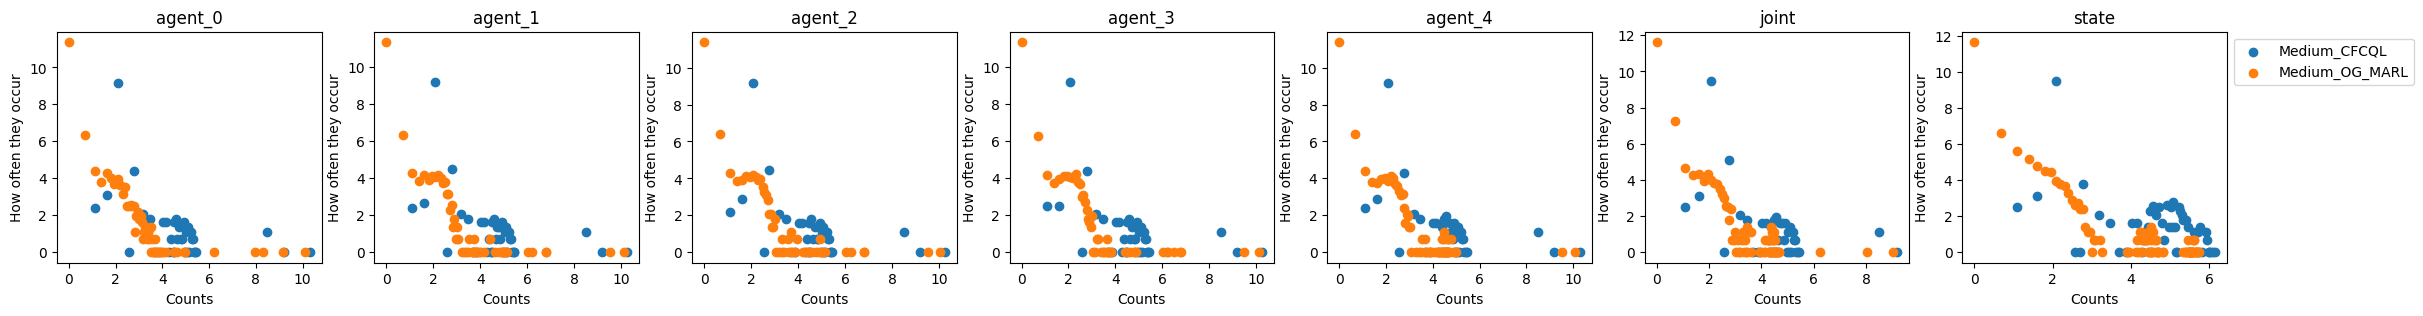

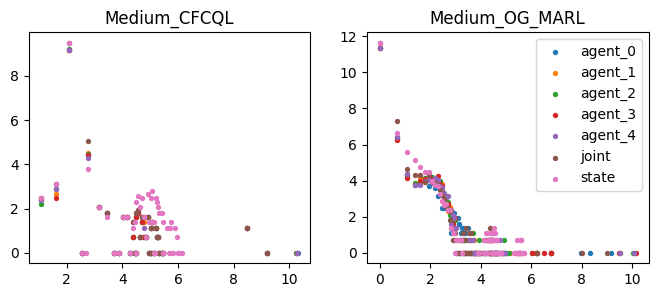

In [41]:
plot_count_frequencies(rel_dir,new_vault_name,vault_uids)

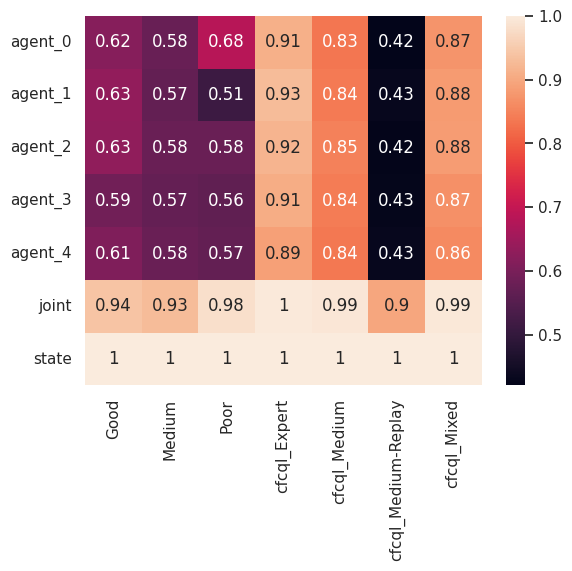

In [33]:
plot_reward_variability(rel_dir,new_vault_name,vault_uids)

In [34]:
def plot_reward_repeat_correlation(rel_dir,vault_name,vault_uids):
    num_unique = {}
    probs = {}
    for uid in vault_uids:
        with open(rel_dir+"/"+vault_name+"/"+uid+"/number_unique.pickle","rb") as f:
            num_unique[uid] = pickle.load(f)

        with open(rel_dir+"/"+vault_name+"/"+uid+"/processed_reward_info.pickle","rb") as f:
            (probs[uid], _) = pickle.load(f)

        plt.scatter(num_unique[uid].values(),probs[uid].values(),label=str(uid))
        plt.scatter(num_unique[uid]['state'],probs[uid]['state'],marker='o',facecolors='none',edgecolors='black')

        # maybe times rewards by any 2 -> prob of getting contradicting data

    plt.legend(bbox_to_anchor=(1,1))
    plt.show()
    return

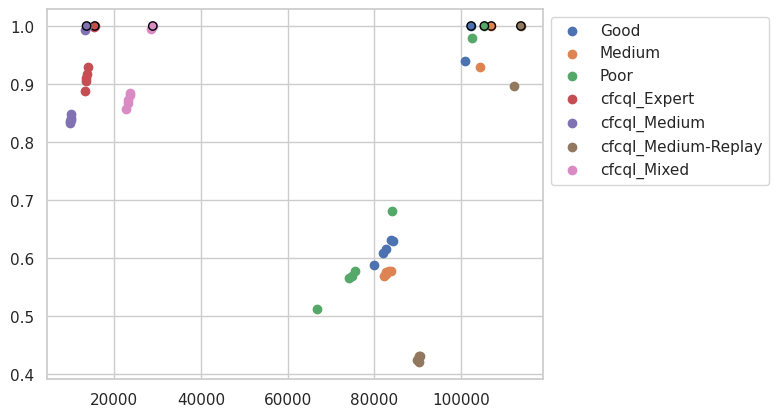

In [35]:
plot_reward_repeat_correlation(rel_dir,new_vault_name,vault_uids)